In [2]:
import torch
import torch.nn as nn

class SineLayer(nn.Module):
    def __init__(self,A,f,phi):
        super(SineLayer,self).__init__()
        # Initialize A, f, and phi as learnable parameters
        self.A = nn.Parameter(torch.tensor(A),requires_grad=True)   # Amplitude
        self.f = nn.Parameter(torch.tensor(f),requires_grad=True)   # Frequency
        self.phi = nn.Parameter(torch.tensor(phi),requires_grad=True) # Phase shift

    def forward(self, t):
        # Compute the sine function
        return self.A * torch.sin(self.f * t + self.phi)




# Instantiate the layer
sine_layer = SineLayer(1.0,0.05,0.0)
t = torch.linspace(0, 1000, steps=1001, requires_grad=True)
output = sine_layer(t)
output.backward(torch.ones_like(output))
first_derivative = t.grad

t_2 = torch.linspace(0, 1000, steps=1001, requires_grad=True)
learn_sine_layer = SineLayer(1.0,0.05,0.5)
learn_output = learn_sine_layer(t_2)
learn_output.backward(torch.ones_like(learn_output))
learn_first_derivative = t_2.grad

In [3]:
import matplotlib.pyplot as plt

def plot_output(data_dict):
    plt.figure(figsize=(18, 6))
    
    for name, data in data_dict.items():
        data_np = data.detach().numpy()
        plt.plot(data_np, label=name)
    
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.title('Plot of Series')
    plt.legend()
    plt.show()

In [4]:
o_prod = output* first_derivative
l_prod = learn_output * learn_first_derivative
prod_dif = o_prod - l_prod

prod_view = {
    'Output * First Derivative': o_prod,
    'Learned Output * Learned First Derivative': l_prod,
    'Difference of Products': prod_dif
}

In [5]:
view = {'Output': output
        , 'Output First Derivative': first_derivative
       , 'learn_output':learn_output
       , 'learn_d': learn_first_derivative
       }

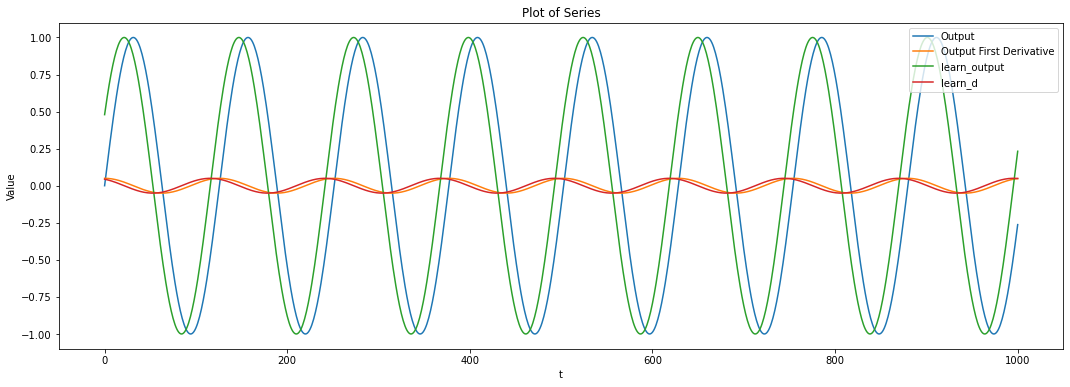

In [6]:
if first_derivative is None:
    print("Gradient computation failed. Ensure that the input tensor has requires_grad=True and backward() is called properly.")
else:
    # Plot the output and first derivative
    plot_output(view)

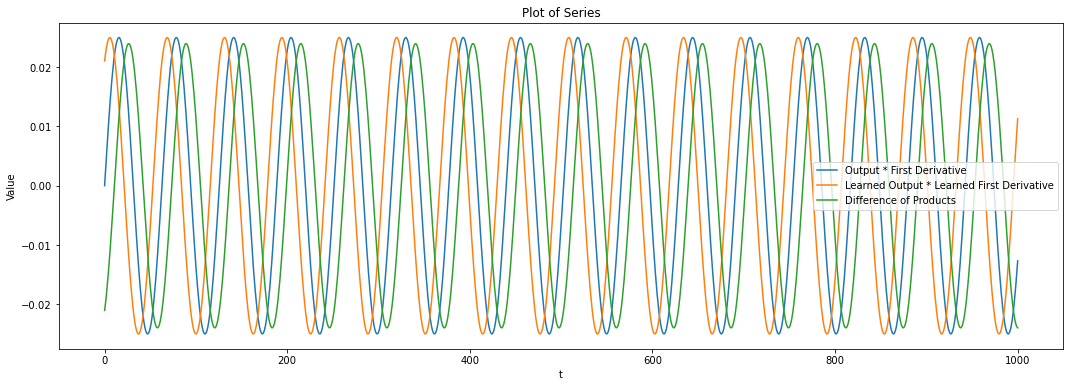

In [7]:
plot_output(prod_view)

In [113]:
torch.sum(first_derivative -learn_first_derivative)

tensor(0.)

In [114]:
torch.sum(first_derivative * learn_first_derivative)

tensor(1.2461)

In [115]:
torch.sum(first_derivative - learn_first_derivative)

tensor(0.)